<a href="https://colab.research.google.com/github/SaurabhSRP/04-NLP-based-Projects/blob/main/Next%20Word%20Prediction%20using%20LSTM/Next_Word_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import re

In [2]:
file = open("/content/The_Whale.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) ##Forms a single text file instead of list of lines or sentences

#**Data Preprocessing and cleaning**

In [3]:
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data=re.sub("[^a-zA-Z]",' ',data)
data=data.lower()
data=data.split()

data=' '.join(data)
corpus=data[10000:15000] #taking the corpus of 5000 words because google colab cant handle this big data

In [5]:
len(corpus)

5000

#**Feature Engineering**
* Tokenization
* Converting each word with a unique number

In [6]:
tokenizer = Tokenizer() ##imported from tensorflow
tokenizer.fit_on_texts([corpus])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([corpus])[0] #converting each word/token to a sequence number
sequence_data[:15]

[24, 4, 8, 117, 16, 5, 118, 58, 119, 2, 120, 7, 59, 121, 122]

In [7]:
len(sequence_data)

964

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

466


#**Data Preparation for LSTM**

In [9]:
sequences = [] #Here we create a dataset such that previous 4 words will become X and 5th word will be the prediction

for i in range(4, len(sequence_data)):
    words = sequence_data[i-4:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  960


array([[ 24,   4,   8, 117,  16],
       [  4,   8, 117,  16,   5],
       [  8, 117,  16,   5, 118],
       [117,  16,   5, 118,  58],
       [ 16,   5, 118,  58, 119],
       [  5, 118,  58, 119,   2],
       [118,  58, 119,   2, 120],
       [ 58, 119,   2, 120,   7],
       [119,   2, 120,   7,  59],
       [  2, 120,   7,  59, 121]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0:4])
    y.append(i[4])
    
X = np.array(X)
y = np.array(y)

In [11]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[ 24   4   8 117]
 [  4   8 117  16]
 [  8 117  16   5]
 [117  16   5 118]
 [ 16   5 118  58]
 [  5 118  58 119]
 [118  58 119   2]
 [ 58 119   2 120]
 [119   2 120   7]
 [  2 120   7  59]]
Response:  [ 16   5 118  58 119   2 120   7  59 121]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5] 
##Creating a matrix to match the vocab size ,same as padding

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#**Model Creation**

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=4)) #word embedding
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 10)             4660      
                                                                 
 lstm (LSTM)                 (None, 4, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 466)               466466    
                                                                 
Total params: 13,520,126
Trainable params: 13,520,126
Non-trainable params: 0
_________________________________________________________________


#**Model Visualisation**

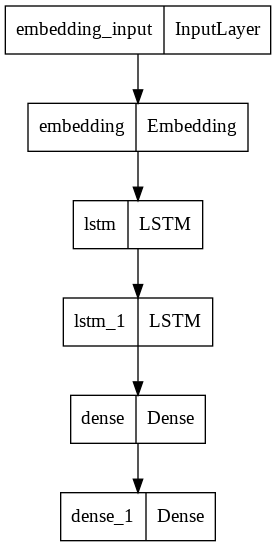

In [15]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

#**Model Training**

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint #this will help to save model for future use

checkpoint = ModelCheckpoint("model_weigths.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001)) 
model.fit(X, y, epochs=100, batch_size=64, callbacks=[checkpoint])

Epoch 1/100
13/15 [=========================>....] - ETA: 0s - loss: 6.0225
Epoch 1: loss improved from inf to 5.99776, saving model to model_weigths.h5
15/15 [==============================] - 4s 46ms/step - loss: 5.9978
Epoch 2/100
13/15 [=========================>....] - ETA: 0s - loss: 5.6255
Epoch 2: loss improved from 5.99776 to 5.65125, saving model to model_weigths.h5
15/15 [==============================] - 1s 38ms/step - loss: 5.6512
Epoch 3/100
13/15 [=========================>....] - ETA: 0s - loss: 5.5289
Epoch 3: loss improved from 5.65125 to 5.53966, saving model to model_weigths.h5
15/15 [==============================] - 1s 38ms/step - loss: 5.5397
Epoch 4/100
12/15 [=======================>......] - ETA: 0s - loss: 5.4758
Epoch 4: loss improved from 5.53966 to 5.47814, saving model to model_weigths.h5
15/15 [==============================] - 1s 39ms/step - loss: 5.4781
Epoch 5/100
12/15 [=======================>......] - ETA: 0s - loss: 5.3700
Epoch 5: loss improved f

#**Model Prediction**

In [17]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('model_weigths.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [18]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-4:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: the stern of the
['the', 'stern', 'of', 'the']
1/1 [==============================] - 1s 604ms/step
ship
Enter your line: fuzzing up the water
['fuzzing', 'up', 'the', 'water']
1/1 [==============================] - 0s 15ms/step
through
Enter your line: white all over a voyage to
['over', 'a', 'voyage', 'to']
1/1 [==============================] - 0s 16ms/step
greenland
Enter your line: whales goldsmith to johnson in the
['to', 'johnson', 'in', 'the']
1/1 [==============================] - 0s 16ms/step
afternoon
Enter your line: 0
Execution completed.....
